In [1]:
# load libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv ('C:/Users/indug_000/Downloads/train.csv')
test = pd.read_csv('C:/Users/indug_000/Downloads/test.csv')
pID = test['PassengerId']
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#To know the datatypes of all the variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nasser, Mr. Nicholas",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train.describe(include=['int64'])

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [9]:
train.describe(include=['float64'])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [10]:
test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Giles, Mr. Ralph",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [11]:
test.describe(include=['int64'])

,PassengerId,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344
std,120.810458,0.841838,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,0.000000
max,1309.000000,3.000000,8.000000,9.000000


In [12]:
test.describe(include=['float64'])

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [13]:
# Print missing values in train data
a=train.isnull().sum().sort_values(ascending=False)[train.isnull().sum().sort_values(ascending=False)>0]
a

Cabin       687
Age         177
Embarked      2
dtype: int64

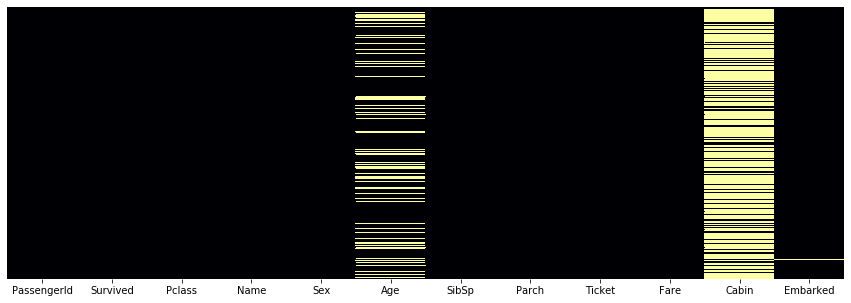

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(train.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

In [15]:
#drop columns cabin since it has more than 50% missing data
train.drop(['Cabin'],axis=1,inplace=True)

In [16]:
#Impute missing values
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Embarked'].fillna(train['Embarked'].ffill(),inplace=True)

In [17]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
train.shape

(891, 11)

In [19]:
# Print missing values in test data
b=test.isnull().sum().sort_values(ascending=False)[test.isnull().sum().sort_values(ascending=False)>0]
b

Cabin    327
Age       86
Fare       1
dtype: int64

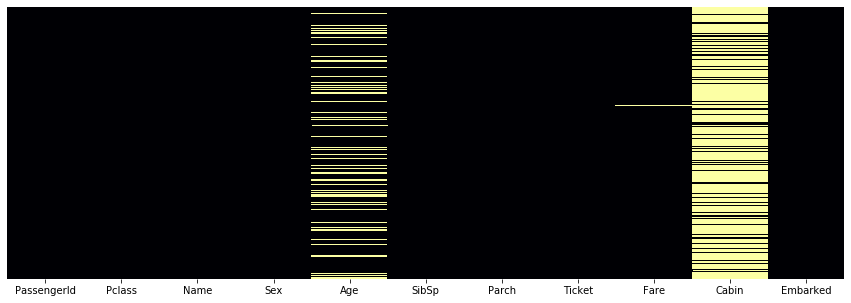

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(test.isnull(), cbar = False, yticklabels=False, cmap="inferno" )

In [21]:
#drop columns cabin since it has more than 50% missing data
test.drop(['Cabin'],axis=1,inplace=True)

In [22]:
#Impute missing values
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [23]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
test.shape

(418, 10)

In [25]:
# Understanding the target variable
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
# Understanding the target variable
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

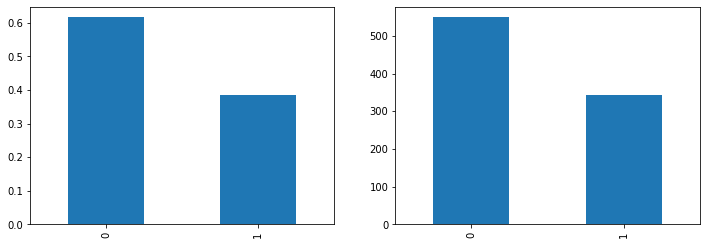

In [27]:
#Visualizing the distribution of the target variable
plt.figure(1,figsize=(12,4))
plt.subplot(121)
train['Survived'].value_counts(normalize=True).plot.bar()
plt.subplot(122)
train['Survived'].value_counts(normalize=False).plot.bar()

outlier treatment

In [28]:
#drop some columna that are not useful
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

In [29]:
train.shape,test.shape

((891, 9), (418, 8))

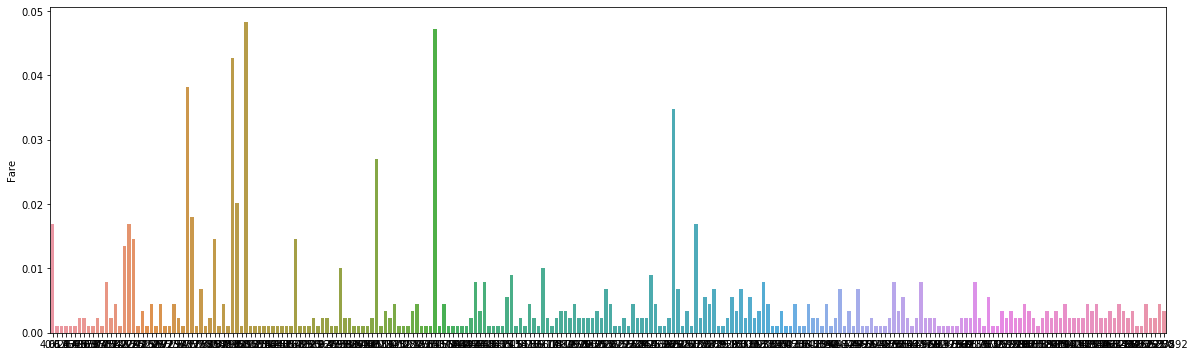

In [30]:
# Visualizing using Fare
plt.figure(figsize=(20,6))
sns.barplot(train['Fare'].value_counts().index,train['Fare'].value_counts(normalize=True))

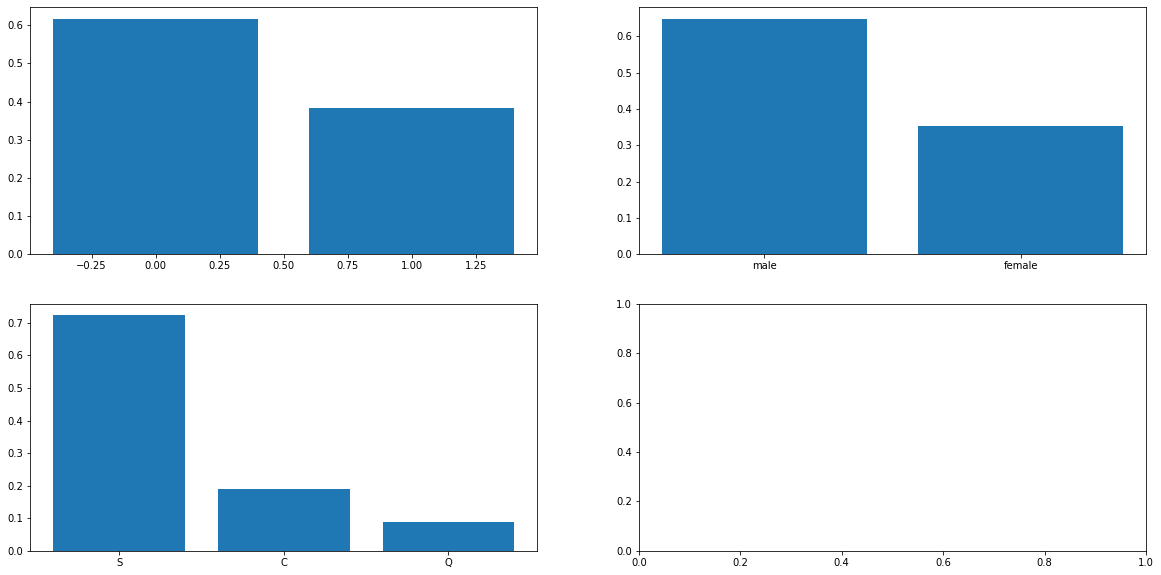

In [31]:
#Visualizing catogerical variable
fig, ax=plt.subplots(2,2,figsize=(20,10))
ax[0,0].bar(train['Survived'].value_counts().index,train['Survived'].value_counts(normalize=True))
ax[0,1].bar(train['Sex'].value_counts().index,train['Sex'].value_counts(normalize=True))
ax[1,0].bar(train['Embarked'].value_counts().index,train['Embarked'].value_counts(normalize=True))
plt.draw()

In [32]:
#label encoding of categorical variable
train['Sex'] = train['Sex'].replace({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].replace({'S':1,'C':2,'Q':3},regex = True)
test['Sex'] = test['Sex'].replace({'male':0, 'female':1})
test['Embarked'] = test['Embarked'].replace({'S':1,'C':2,'Q':3},regex = True)

In [33]:
train.shape

(891, 9)

In [34]:
test.shape

(418, 8)

In [35]:
train_y1 = train.Survived
train_x1= train.drop('Survived',axis=1)

In [38]:
#Splitting Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x1,train_y1,test_size=0.2,random_state = 1)

In [39]:
x_train.shape

(712, 8)

In [40]:
x_test.shape

(179, 8)

In [41]:
y_train.shape

(712,)

In [42]:
y_test.shape

(179,)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, x_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.8062262879835479
SVC 0.6488730513302366
LinearSVC 0.6938328073845573
KNeighbors 0.6263695351558345
DecisionTree 0.7640617428405961
RandomForest 0.8048198182226477
RandomForest2 0.8160715763098488
MLPClassifier 0.616589251734449


In [49]:
from sklearn import metrics
alg = rf2

alg.fit(x_train, y_train)

Y_pred = alg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
print("Confusion Matrix")
metrics.confusion_matrix(y_test,Y_pred)


Confusion Matrix


array([[96, 10],
       [29, 44]], dtype=int64)

In [50]:
Y_pred1 = alg.predict(test)
print(Y_pred1)
#submission = pd.DataFrame({
 #       "PassengerId": test_data["PassengerId"],
  #      "Survived": predictions
   # })

#submission.to_csv('submission.csv', index=False)


[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [51]:
# Generate Submission File
submission = pd.DataFrame({'PassengerId': test["PassengerId"],'Survived' :Y_pred1 })
submission.to_csv('submission.csv',index = False)